In [2]:
import os
ROOT = "/content/drive/MyDrive/deep_learning/ANN"
os.chdir(ROOT)

In [3]:
os.listdir()

['ANN.ipynb']

In [4]:
import tensorflow as tf


In [5]:
tf.__version__

'2.9.2'

In [6]:
tf.keras.__version__

'2.9.0'

In [8]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## **A Simple Classifier Using keras's Sequential API**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os


In [12]:
mnist=tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) =mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [13]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [15]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [14]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [16]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [17]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

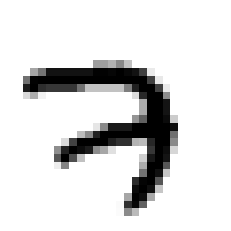

7

In [19]:
plt.imshow(X_train[0], cmap='binary')
plt.axis("off")
plt.show()
y_train[0]

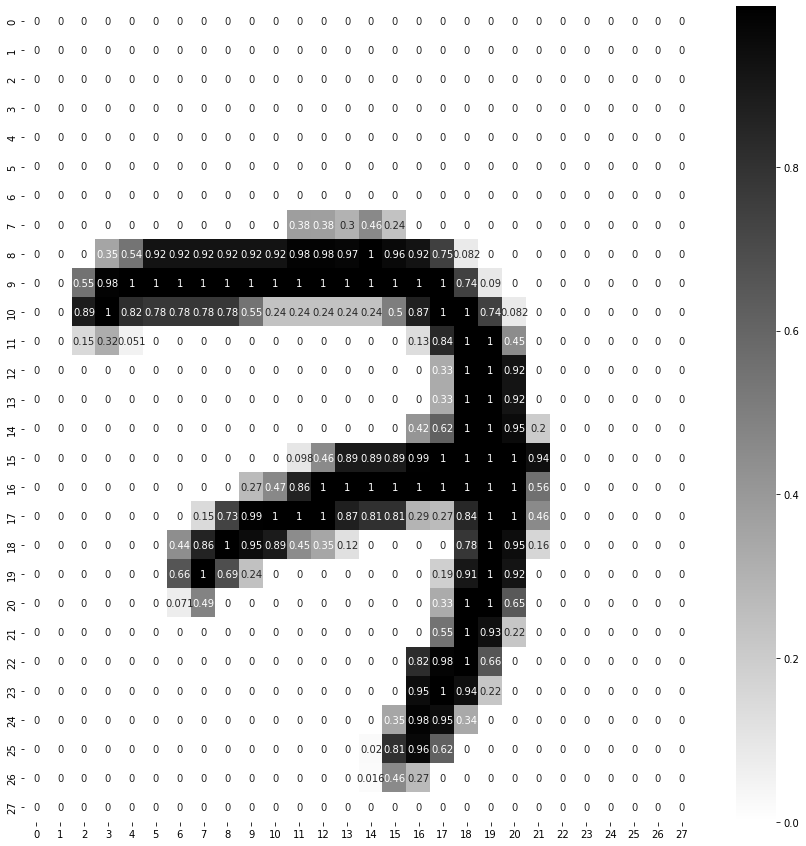

In [20]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [21]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [22]:
model = tf.keras.models.Sequential(LAYERS)

In [23]:
model.layers

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [26]:
hidden1.get_weights()

[array([[-6.5701082e-02, -2.0717978e-03,  2.0297766e-02, ...,
         -2.5792774e-02,  5.9104443e-02,  2.9584244e-03],
        [-7.2327480e-02,  1.1509240e-02,  3.4499310e-02, ...,
         -3.7039034e-02,  5.0379604e-02,  6.0720593e-03],
        [-4.2635664e-02, -3.7306912e-02,  5.8837235e-05, ...,
         -5.9002116e-02, -1.9752502e-02,  3.9601021e-02],
        ...,
        [ 4.8028819e-02, -2.0340458e-02, -2.8620791e-02, ...,
         -6.4668283e-03, -6.6591434e-02, -2.6565630e-02],
        [ 1.2206234e-02,  3.6769912e-02, -4.7060706e-02, ...,
          5.9573084e-02,  5.5267781e-02, -1.9822069e-02],
        [ 7.3377401e-02, -3.6021627e-02,  3.9179124e-02, ...,
          4.6383798e-02,  6.2916294e-02,  5.0153837e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights.shape

(784, 300)

In [29]:
biases.shape

(300,)

# *loss_function(actual,pred)=error*

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [31]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.6061 - accuracy: 0.8456 - val_loss: 0.3063 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2902 - accuracy: 0.9170 - val_loss: 0.2451 - val_accuracy: 0.9300
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2369 - accuracy: 0.9318 - val_loss: 0.2055 - val_accuracy: 0.9416
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2012 - accuracy: 0.9415 - val_loss: 0.1774 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1749 - accuracy: 0.9503 - val_loss: 0.1572 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1545 - accuracy: 0.9558 - val_loss: 0.1435 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1377 - accuracy: 0.9610 - val_loss: 0.1305 - val_accuracy:

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0718 - accuracy: 0.9776


[0.07175221294164658, 0.9775999784469604]

In [33]:
model.save("model.h5")

In [34]:
loaded_model = tf.keras.models.load_model("model.h5")

In [35]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9776


[0.07175221294164658, 0.9775999784469604]

In [37]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.606072,0.845582,0.306346,0.9146
1,0.290202,0.917036,0.245076,0.9300
2,0.236865,0.931836,0.205516,0.9416
3,0.201238,0.941527,0.177355,0.9492
4,0.174866,0.950309,0.157158,0.9566
5,0.154534,0.955836,0.143516,0.9604
6,0.137674,0.960964,0.130527,0.9658
7,0.124572,0.964327,0.121933,0.9648
8,0.113449,0.967618,0.114588,0.9672
9,0.104079,0.970709,0.106529,0.9702


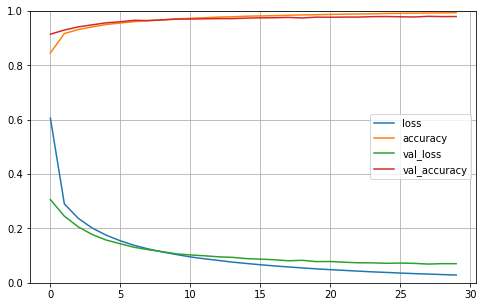

In [38]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
y_pred=np.argmax(y_proba, axis=1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

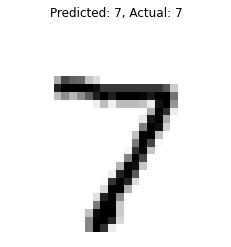

------------------------------------------------------------


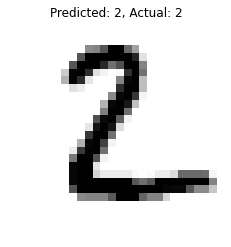

------------------------------------------------------------


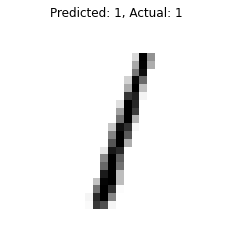

------------------------------------------------------------


In [48]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)